# Coursera IBM Data Science Professional Certificate

## Capstone Project

This notebook is used for the final capstone project in the IBM Data Sceince Professional Certificate

In [1]:
import pandas as pd
import numpy as np

## 1. Getting NY car crashes data

The data was retrieved from the NYC Open Data website. It was filtered to only export rows from 2018 onwards.

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/data

## 2. Importing into Pandas

Let's import this CSV into a Pandas Dataframe

In [2]:
df = pd.read_csv("Data/NY_Crashes_From_2018.csv", parse_dates={"CRASH DATETIME":['CRASH DATE', 'CRASH TIME']})

df.head()

,CRASH DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-01-01 01:37:00,NaN,NaN,40.662277,-73.910780,"(40.662277, -73.91078)",BRISTOL STREET,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3819254,Sedan,Sedan,NaN,NaN,NaN
1,2018-01-01 00:27:00,QUEENS,11419.0,40.689133,-73.820860,"(40.689133, -73.82086)",124 STREET,103 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3821878,Sedan,Taxi,NaN,NaN,NaN
2,2018-01-01 14:30:00,NaN,NaN,40.804707,-73.919140,"(40.804707, -73.91914)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,0.0,...,Other Vehicular,NaN,NaN,NaN,3819072,Sedan,Box Truck,NaN,NaN,NaN
3,2018-01-01 06:07:00,BROOKLYN,11234.0,40.635185,-73.928620,"(40.635185, -73.92862)",UTICA AVENUE,GLENWOOD ROAD,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3820948,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2018-01-01 05:00:00,BROOKLYN,11212.0,40.656220,-73.913155,"(40.65622, -73.913155)",EAST 98 STREET,STRAUSS STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,3819289,Sedan,NaN,NaN,NaN,NaN


We can see the data mentioned the crash date and time, the location of the crash, as well the causes and injuries and fatalities associated with the crash. It also mentions the types of vehicles in the crash.

Let us see the size of the data

In [3]:
df.shape

(543420, 28)

It contains ~540k rows and 29 columns.

## 3. Cleaning the data

Now, we will do some preprocessing to clean the data and get it ready for analysis.

Note that since the data is from the US, CRASH DATE is in MM/DD/YYYY format

### Removing rows with no Latitude & Longitude data

The first step is to remove rows where latitude & longitude are not available, as the location of the crash is going to be vital for this project.

We can use the Location column for this task as it is the aggregate of Latitude and Longitude.

In [4]:
df.dropna(subset=['LOCATION'], inplace=True)

df.shape

(502989, 28)

We now have ~500k rows. More than enough.

### Changing all "Unspecified" values to NaN

Making it easier to process null values.

In [5]:
df = df.replace('Unspecified', np.nan)

### Dropping extra fatalities and injuries columns

We have 8 columns that count the fatalities and injuries in the crash. We don't really need the detail whether it was a motorist, cyclist, or a pedestrian. 

The "NUMBER OF PERSONS KILLED" and "NUMBER OF PEDESTRIANS INJURED" columns aggregate the different types and are sufficient for our use.

In [6]:
df.drop(['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'], axis='columns', inplace=True)

### Dropping extra contributing factors columns

There are a lot of columns listing the contributing factors, but we can see that only the first couple of columns have significant data. The dataset does not have a lot of information in the contributing factors 3, 4 and 5 columns.

In [7]:
print(f"Count of CONTRIBUTING FACTOR VEHICLE 3 = {df['CONTRIBUTING FACTOR VEHICLE 3'].notnull().sum()}")
print(f"Count of CONTRIBUTING FACTOR VEHICLE 4 = {df['CONTRIBUTING FACTOR VEHICLE 4'].notnull().sum()}")
print(f"Count of CONTRIBUTING FACTOR VEHICLE 5 = {df['CONTRIBUTING FACTOR VEHICLE 5'].notnull().sum()}")

Count of CONTRIBUTING FACTOR VEHICLE 3 = 2212
Count of CONTRIBUTING FACTOR VEHICLE 4 = 409
Count of CONTRIBUTING FACTOR VEHICLE 5 = 116


Considering the total dataset is of ~500k rows, we can consider these columns negligible.

In [8]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5'], axis = 1, inplace = True)

### Dropping extra Vehicle Type Code columns

Similarly, there are extra Vehicle Type Code columns 3, 4, and 5 which can be dropped due to the low amount of data.

In [9]:
print(f"Count of VEHICLE TYPE CODE 3 = {df['VEHICLE TYPE CODE 3'].notnull().sum()}")
print(f"Count of VEHICLE TYPE CODE 4 = {df['VEHICLE TYPE CODE 4'].notnull().sum()}")
print(f"Count of VEHICLE TYPE CODE 5 = {df['VEHICLE TYPE CODE 5'].notnull().sum()}")

df.drop(['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis = 1, inplace = True)

Count of VEHICLE TYPE CODE 3 = 33295
Count of VEHICLE TYPE CODE 4 = 7611
Count of VEHICLE TYPE CODE 5 = 2125


### Dropping extra Location columns

As it is only an aggregate of Latitude and Longitude columns, we can drop the LOCATIONS columns.

Furthermore, as we have the longitutde and latitude, the ON, CROSS, and OFF STREET NAME columns are unnecessary

In [10]:
df.drop(['LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'BOROUGH', 'ZIP CODE'], axis = 1, inplace = True)

### Moving COLLISION ID column to the beginning

Just to make things nice to look at.

In [11]:
df = df[ ['COLLISION_ID'] + [ col for col in df.columns if col != 'COLLISION_ID' ] ]

### Resetting the index

We deleted some rows so the index doesn't match the rows. Let's fix that.

In [12]:
df.reset_index(inplace = True, drop = True)

### Eyeballing the final dataframe

Let's have a look at our cleaned dataframe:

In [13]:
df.tail()

,COLLISION_ID,CRASH DATETIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
502984,4369083,2020-11-17 08:05:00,40.611774,-74.07069,0.0,0.0,Driver Inattention/Distraction,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
502985,4368497,2020-11-17 19:00:00,40.710800,-74.00342,0.0,0.0,NaN,NaN,Sedan,Box Truck
502986,4368866,2020-11-17 01:00:00,40.686844,-73.90945,0.0,0.0,View Obstructed/Limited,NaN,Station Wagon/Sport Utility Vehicle,NaN
502987,4368579,2020-11-17 17:15:00,40.856613,-73.86864,0.0,0.0,Driver Inattention/Distraction,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
502988,4368547,2020-11-17 18:00:00,40.760742,-73.95693,0.0,0.0,Driver Inattention/Distraction,NaN,Sedan,Sedan


## 4. Initial statistical exploration of NYC crashes

Now is a good time to do some initial exploration and develop a sense of the data trends.

### Number of Crashes by Year

In [19]:
yearly_stats = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]
yearly_stats = yearly_stats.groupby(yearly_stats['CRASH DATETIME'].map(lambda x: x.year)).sum() 
yearly_crashes_count = df.groupby(df['CRASH DATETIME'].map(lambda x: x.year)).count()
yearly_stats["TOTAL CRASHES"] = yearly_crashes_count['CRASH DATETIME']
yearly_stats["INJURY RATE"] = (yearly_stats["NUMBER OF PERSONS INJURED"]/yearly_stats["TOTAL CRASHES"])* 100
yearly_stats["FATALITY RATE"] = (yearly_stats["NUMBER OF PERSONS KILLED"]/yearly_stats["TOTAL CRASHES"])* 100
yearly_stats = yearly_stats[ ['TOTAL CRASHES'] + [ col for col in yearly_stats.columns if col != 'TOTAL CRASHES' ] ]
yearly_stats

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH DATETIME,,,,,
2018,216443,58016.0,217.0,26.804286,0.100257
2019,194111,55907.0,227.0,28.801562,0.116943
2020,92435,35819.0,202.0,38.750473,0.218532


We can see that in 2018 and 2018, around 26-28% of crashes resulted in an injury, and around 0.1% of crashes resulted in a death.

This trend seems to have increased in 2020. There are lesser crashes, but they seem to be deadlier, looking at the higher injury and fatality rates/

There are a few important factors to consider in 2020:
    - The data is only available upto November 17, 2020
    - Due to the COVID-19 pandemic, there were periods of lockdown with less drivers and people on the road
    - Hospital services might have been underperforming due to COVID-19
    - Due to larger sample size, the data in 2018 and 2019 includes more accidents with no injuries and fatalities which skews the data

Considering November 17 is almost the end of the year, we can approximate 2020 as a full year.

Let's plot that.

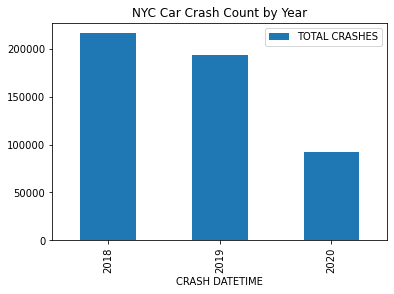

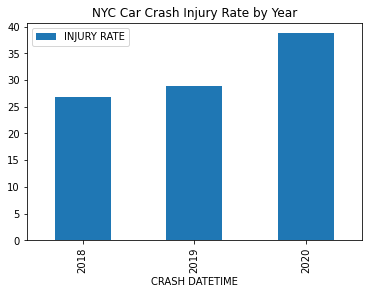

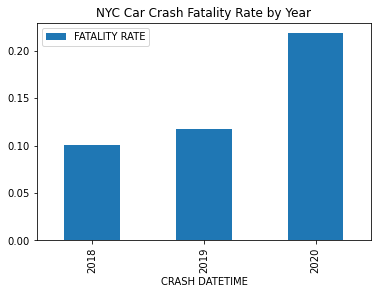

In [20]:
yearly_stats.plot(y = ["TOTAL CRASHES"], kind = "bar", title = "NYC Car Crash Count by Year")
yearly_stats.plot(y = ["INJURY RATE"], kind = "bar", title = "NYC Car Crash Injury Rate by Year")
yearly_stats.plot(y = ["FATALITY RATE"], kind = "bar", title = "NYC Car Crash Fatality Rate by Year")